<a href="https://colab.research.google.com/github/JhonatanIT/python-colab-notebooks/blob/main/CustomerChurnModelDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Development

## a) Problem Statement

Customer churn or attrition is when customers or subscribers stop using or paying for a company's product or service. It is a critical metric because retaining existing customers is much less expensive than acquiring new customers. For these reason we are going to explore, create a decision tree model and predict the client's churn using Kaggle telco churn dataset.

## b) Exploratory Data Analysis


**Libraries import**

In [44]:
import pandas as pd               #create tables, dataframes and structures to manipulate data
import numpy as np                #multidimensional array object(arrays and matrices)
import matplotlib.pyplot as plt   #Data visualization
import seaborn as sns             #Data visualization (more aesthetic)

#To allow Jupyter notebooks to use matplotlib
%matplotlib inline

**Get data**

In [45]:
#Using pandas to create a dataframe of excel file
#data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')     #reading csv
df = pd.read_excel('Assess2_Data.xlsx')

#Reference Dataset
#https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Data exploration with Pandas**

In [46]:
#The first 5 rows
df.head()

#At first sight, we have a lot of categorical columns:
# if the categorical columns only posses Yes/No values, they could be converted to 0/1 columns with LabelEncoder
# Otherwise, they have to be convert to dummy columns before to create a decisioin tree model

customerID  gender  SeniorCitizen Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0         No       1           No   
1  5575-GNVDE    Male              0         No      34          Yes   
2  3668-QPYBK    Male              0         No       2          Yes   
3  7795-CFOCW    Male              0         No      45           No   
4  9237-HQITU  Female              0         No       2          Yes   

      MultipleLines OnlineBackup DeviceProtection TechSupport StreamingMovies  \
0  No phone service          Yes               No          No              No   
1                No           No              Yes          No              No   
2                No          Yes               No          No              No   
3  No phone service           No              Yes         Yes              No   
4                No           No               No          No              No   

         Contract PaperlessBilling              PaymentMethod  TotalCharges  \
0  Month-to-month              Yes           Electronic check         29.85   
1        One year               No               Mailed check       1889.50   
2  Month-to-month              Yes               Mailed check        108.15   
3        One year               No  Bank transfer (automatic)       1840.75   
4  Month-to-month              Yes           Electronic check        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [47]:
#See the data type of each column, as well how many missing values there are.
#There is only 1 column with missing values: TotalCharges
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

## c) Data Cleaning and Feature Selection

**Pre-processing**

In this step we have to transform categorical columns to numeric columns and complete the missing values of **TotalCharges**.

In [48]:
#TRANSFORM CATEGORICAL COLUMNS
from sklearn.preprocessing import LabelEncoder

#if the categorical columns only posses Yes/No values, they could be converted to 0/1 columns with LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:    
    #if the number of values = 2 and is categorical column
    if df[column].value_counts().count() == 2 and df[column].dtype == 'object':
      print('Transforming categorical column:', column, "in a binary column")
      df[column] = label_encoder.fit_transform(df[column])

Transforming categorical column: gender in a binary column
Transforming categorical column: Dependents in a binary column
Transforming categorical column: PhoneService in a binary column
Transforming categorical column: PaperlessBilling in a binary column
Transforming categorical column: Churn in a binary column


In [49]:
#See the new dataset with the new transformation in the columns
df.head()

customerID  gender  SeniorCitizen  Dependents  tenure  PhoneService  \
0  7590-VHVEG       0              0           0       1             0   
1  5575-GNVDE       1              0           0      34             1   
2  3668-QPYBK       1              0           0       2             1   
3  7795-CFOCW       1              0           0      45             0   
4  9237-HQITU       0              0           0       2             1   

      MultipleLines OnlineBackup DeviceProtection TechSupport StreamingMovies  \
0  No phone service          Yes               No          No              No   
1                No           No              Yes          No              No   
2                No          Yes               No          No              No   
3  No phone service           No              Yes         Yes              No   
4                No           No               No          No              No   

         Contract  PaperlessBilling              PaymentMethod  TotalCharges  \
0  Month-to-month                 1           Electronic check         29.85   
1        One year                 0               Mailed check       1889.50   
2  Month-to-month                 1               Mailed check        108.15   
3        One year                 0  Bank transfer (automatic)       1840.75   
4  Month-to-month                 1           Electronic check        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [50]:
#Evaluate statistical features: only for numeric columns
df.describe()

#Commentaries:
#Gender: There seems to be the same quantity of female and male.
#SeniorCitizen: The majority of the people are NO SeniorCitizen
#Dependents: There are more people with NO dependents.
#Tenure appears to have a good data distribution (mean and median is almost the same)
#PhoneService: The majority of the people have PhoneService.
#PaperlessBilling: There seems to be the same quantity of PaperlessBilling and NO PaperlessBilling.
#TotalCharges: could have outliers (There is a big difference between mean value and median).
#Churn (variable to be predicted): There are more NO churn result than churn. (may lead to a slight bias to prefer non-churn results in the prediction)

gender  SeniorCitizen   Dependents       tenure  PhoneService  \
count  7043.000000    7043.000000  7043.000000  7043.000000   7043.000000   
mean      0.504756       0.162147     0.299588    32.371149      0.903166   
std       0.500013       0.368612     0.458110    24.559481      0.295752   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  TotalCharges        Churn  
count       7043.000000   7032.000000  7043.000000  
mean           0.592219   2283.300441     0.265370  
std            0.491457   2266.771362     0.441561  
min            0.000000     18.800000     0.000000  
25%            0.000000    401.450000     0.000000  
50%            1.000000   1397.475000     0.000000  
75%            1.000000   3794.737500     1.000000  
max            1.000000   8684.800000     1.000000

In [51]:
#COMPLETE MISSING TotalCharges VALUES

#see: https://www.makeuseof.com/fill-missing-data-with-pandas/

#Because the TotalCharges mean is altered by outlier values, it would be better to use the median
#df['TotalCharges'].fillna(df['TotalCharges'].median()[0], inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)

In [52]:
#See again df.info() to check for missing values
df.info()

#Now is ok (There aren't missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   int64  
 13  PaymentMethod     7043 non-null   object 
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   int64  
dtypes: float64(1), int64(7), object(8)
memory 

**Visualizacion**

<Axes: >

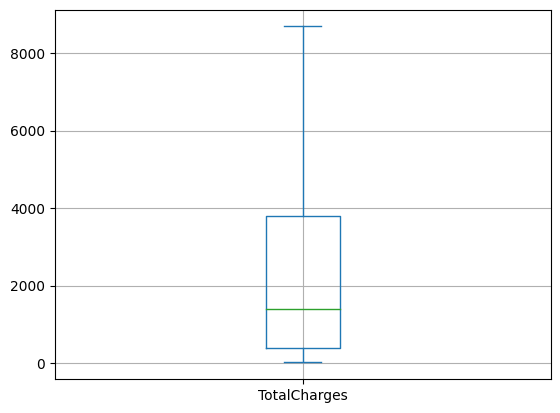

In [53]:
#BOX PLOT
#To see outliers of TotalCharges
df['TotalCharges'].plot.box(grid='True')

#There are no outliers, but data is uneven

Text(0.5, 0, 'TotalCharges')

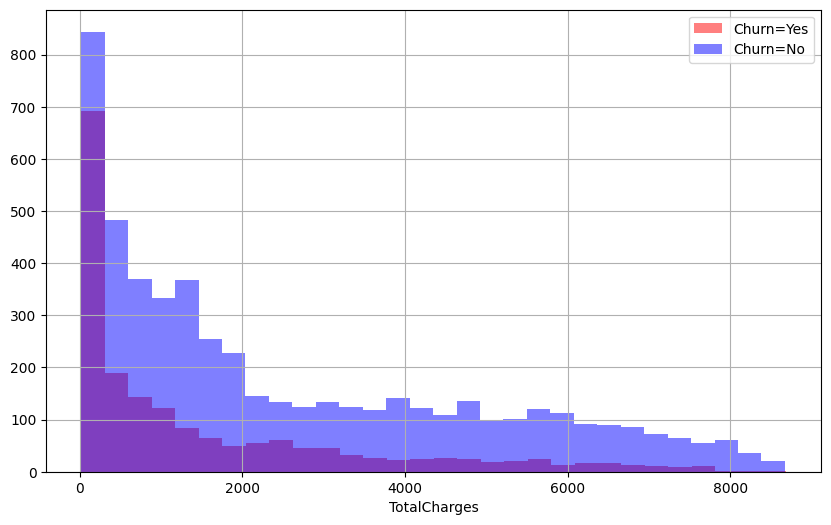

In [54]:
#HISTOGRAM
#a histogram of two TotalCharges distributions on top of each other, one for each Churn

plt.figure(figsize=(10,6))
df[df['Churn']==1]['TotalCharges'].hist(alpha=0.5,color='red',bins=30,label='Churn=Yes')
df[df['Churn']==0]['TotalCharges'].hist(alpha=0.5,color='blue',bins=30,label='Churn=No')
plt.legend()
plt.xlabel('TotalCharges')

#Commentaries
#We can see with the lowest TotalCharges is more likely to be churn.
#The higher TotalCharge, the lower no-churn trend.

<Axes: xlabel='MultipleLines', ylabel='count'>

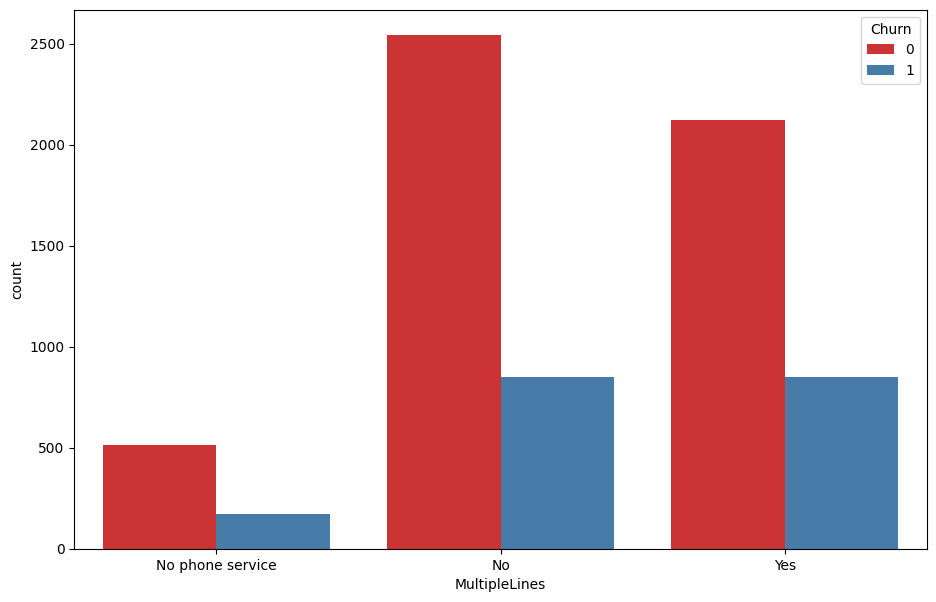

In [55]:
#COUNTPLOT
#Creates a countplot using seaborn showing the MultipleLines, with the hue defined by Churn.

plt.figure(figsize=(11,7))
sns.countplot(x='MultipleLines',hue='Churn',data=df,palette='Set1')

#Commentaries
#The majority of the data is No-Churn data

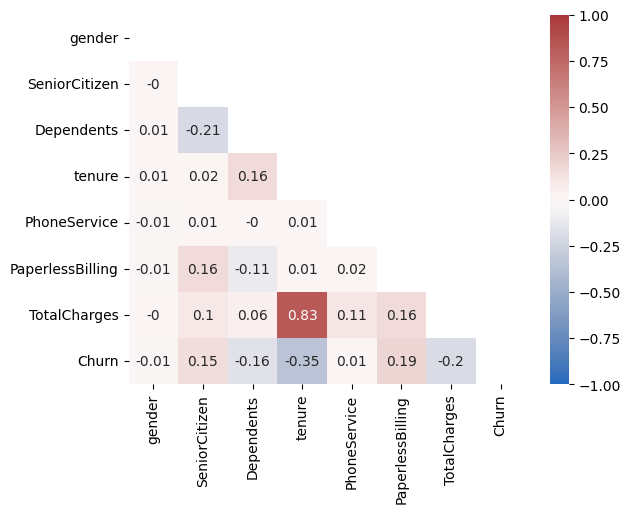

In [56]:
#CORRELATION MATRIX
# Calculating a Correlation Matrix with Pandas
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

#Commentaries
#TotalCharges and tenure are directly correlated
#Churn doesn't have a strong relation with any variable (only a few inversely correlated with tenure)

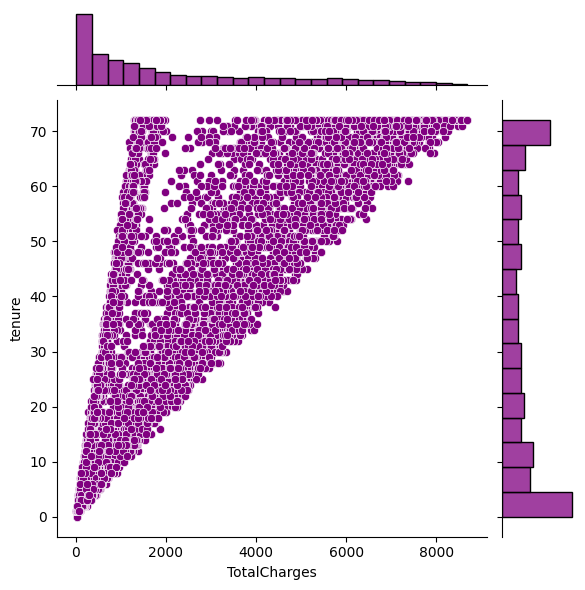

In [57]:
#JOINPLOT

#Let's look at the trend between the TotalCharges score and tenue. Recreate the following joinplot.
sns.jointplot(x='TotalCharges',y='tenure',data=df,color='purple')

#Commentaries:
#Sounds sense: the length of time since the beginning of the customer relationship (tenure) is directly proportional of the number of TotalCharges

In [58]:
#EVALUATING customerID COLUMN

#Doesn't matter this column in the prediction as they are only Id's
print('Values of customerID:', df['customerID'].value_counts().count())

Values of customerID: 7043


In [59]:
#Drop the customerID column
df = df.drop('customerID', axis=1)

In [60]:
#See the new dataset without customerID column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   DeviceProtection  7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   StreamingMovies   7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   int64  
 12  PaymentMethod     7043 non-null   object 
 13  TotalCharges      7043 non-null   float64
 14  Churn             7043 non-null   int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 825.5+ KB


In [61]:
#TRANSFORMING THE REST OF CATHEGORICAL VALUES IN DUMMY VARIABLES

#Create a list with the rest of cathegorical values
cat_feats = []

for column in df.columns:    
    #if it is a categorical column
    if df[column].dtype == 'object':
      cat_feats.append(column)

print("Columns to be converted into dummy variables:", cat_feats)

Columns to be converted into dummy variables: ['MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [62]:
#Now use pd.get_dummies (loans, columns = cat_feats, drop_first = True) to create a larger dataframe that has new feature columns with dummy variables. 
final_data=pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [63]:
#Sklearn only use numerical columns
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   TotalCharges                           7043 non-null   float64
 7   Churn                                  7043 non-null   int64  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  OnlineBackup_No internet service       7043 non-null   uint8  
 11  Onli

## d) Model Building

In [64]:
#Now it is time to use sklearn and split our data into a training set and a test set.

from sklearn.model_selection import train_test_split
final_data.describe()

gender  SeniorCitizen   Dependents       tenure  PhoneService  \
count  7043.000000    7043.000000  7043.000000  7043.000000   7043.000000   
mean      0.504756       0.162147     0.299588    32.371149      0.903166   
std       0.500013       0.368612     0.458110    24.559481      0.295752   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  TotalCharges        Churn  \
count       7043.000000   7043.000000  7043.000000   
mean           0.592219   2279.765853     0.265370   
std            0.491457   2266.762876     0.441561   
min            0.000000     18.800000     0.000000   
25%            0.000000    398.550000     0.000000   
50%            1.000000   1394.550000     0.000000   
75%            1.000000   3786.600000     1.000000   
max            1.000000   8684.800000     1.000000   

       MultipleLines_No phone service  MultipleLines_Yes  ...  \
count                     7043.000000        7043.000000  ...   
mean                         0.096834           0.421837  ...   
std                          0.295752           0.493888  ...   
min                          0.000000           0.000000  ...   
25%                          0.000000           0.000000  ...   
50%                          0.000000           0.000000  ...   
75%                          0.000000           1.000000  ...   
max                          1.000000           1.000000  ...   

       DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  \
count           7043.000000                      7043.000000      7043.000000   
mean               0.343888                         0.216669         0.290217   
std                0.475038                         0.412004         0.453895   
min                0.000000                         0.000000         0.000000   
25%                0.000000                         0.000000         0.000000   
50%                0.000000                         0.000000         0.000000   
75%                1.000000                         0.000000         1.000000   
max                1.000000                         1.000000         1.000000   

       StreamingMovies_No internet service  StreamingMovies_Yes  \
count                          7043.000000          7043.000000   
mean                              0.216669             0.387903   
std                               0.412004             0.487307   
min                               0.000000             0.000000   
25%                               0.000000             0.000000   
50%                               0.000000             0.000000   
75%                               0.000000             1.000000   
max                               1.000000             1.000000   

       Contract_One year  Contract_Two year  \
count        7043.000000        7043.000000   
mean            0.209144           0.240664   
std             0.406726           0.427517   
min             0.000000           0.000000   
25%             0.000000           0.000000   
50%             0.000000           0.000000   
75%             0.000000           0.000000   
max             1.000000           1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%    

In [65]:
#Variables to create the model
x = final_data.drop(['Churn'],axis=1)

#Variable to predict
y = final_data['Churn']

#Get data for train and test (30% of data will use to test the model)
#random state: It's the seed to maintain the same result 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=101)

**Train a decision tree**

In [66]:
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier: use different criterion like:
# The supported criteria are "gini" for the Gini impurity and "log_loss" and "entropy" both for the Shannon information gain. 
dtree = DecisionTreeClassifier(criterion='gini',random_state=101)

#Train the decision tree model with the training data
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=101)

**Decision Tree Prediction and Evaluation**

Create predictions from the test set and create a classification report and confusion matrix.

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

#Use test data to make predictions
predictions = dtree.predict(x_test)

#classification_report: metrics to measure your results
#Precision: Precision measures the accuracy of positive predictions -> Precision(1) = 0.47 -> when it predicts churn, it is correct 47% of the time.
#Recall: Recall measures the coverage of actual positive labels -> Recall(1) = 0.46 -> it correctly identifies 46% of churn cases.
#f1-socre: the harmonic mean of precision and recall.
#support:  how many times a particular class appears in the test data set (there are more data for non-churn)

#accuracy: the fraction of predictions our model got right -> Nuuber of correct predictions / total number of predictions
#macro avg: arithmetic mean of all the per-class F1 scores.
#weighted avg: the mean of all per-class F1 scores while considering each class’s support.

print(classification_report(y_test,predictions))

#Reference
#https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
#https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1546
           1       0.47      0.46      0.46       567

    accuracy                           0.71      2113
   macro avg       0.63      0.63      0.63      2113
weighted avg       0.71      0.71      0.71      2113



In [68]:
#confusion_matrix:
print(confusion_matrix(y_test,predictions))

# True non-churn  | False churn
# False non-churn | True churn 

#The value at position (0,0) represents the number of times class 0 was predicted correctly.
#The value at position (0,1) represents the number of times class 1 was predicted incorrectly.
#The value at position (1,0) represents the number of times class 0 was predicted incorrectly.
#The value at position (1,1) represents the number of times class 1 was predicted correctly.

[[1248  298]
 [ 307  260]]


**Decision Tree Visualization**

In [69]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

import os
import io

#Array of columns
features = list(final_data.columns[1:])

#Set environment variable
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#create an in-memory buffer for storing the GraphViz representation of the decision tree1.
dot_data = io.StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

#generates a GraphViz representation of the decision tree, which is then converted into an image format using pydot1.
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

**Improving model development with Random Forest**

In [70]:
from sklearn.ensemble import RandomForestClassifier


#Create a Random Forest with 100 decision tree (n_estimators=100)
#Generally the precision is better because get the best result of a set of decision tree
rfc = RandomForestClassifier(n_estimators=100,random_state=101,criterion='gini')

#Train the RandomForest
rfc.fit(x_train, y_train)

#Reference
#https://towardsdatascience.com/random-forests-algorithm-explained-with-a-real-life-example-and-some-python-code-affbfa5a942c

RandomForestClassifier(random_state=101)

**RandomForest Prediction and Evaluation**

Create predictions from the test set and create a classification report and confusion matrix.

In [71]:
rfc_pred = rfc.predict(x_test)

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1546
           1       0.59      0.43      0.50       567

    accuracy                           0.77      2113
   macro avg       0.70      0.66      0.67      2113
weighted avg       0.75      0.77      0.75      2113



In [72]:
#confusion_matrix:
print(confusion_matrix(y_test,rfc_pred))

# True non-churn  | False churn
# False non-churn | True churn 

[[1374  172]
 [ 322  245]]


## Interpretation of Churn Analysis

**The effectivenes of your churn analysis:**

---
What was the percentage of time at which your analysis was able to correctly identify the churn? Can this be considered a satisfactory outcome? Explain why or why not.

- Considering the precision of churn in the decision tree model was 0.47 that means 47% of churn prediction is right. But it was improved with the RandomForest model: 0.59, that means 59% of churn prediction is right. Well, this precision it's not higher than the precision of non-churn cases, as the churn and non-churn data is unbalanced. However in general terms, the model is something satisfactory.

---
Who is churning: Describe the attributes of the customers who are churning and explain what is driving the churn

- It's quite difficult to precise what attributes of the customer make
churning, as we have seen in the correlation matrix Churn doesn't have a strong relation with any variable (only a few inversely correlated with tenure: -0.35)

---
Improving the accuracy of your churn analysis: Describe the effects that your previous steps, model development and handling of missing values had on the outcome of your churn analysis and how the accuracy of your churn analysis could be improved.

- Firstly the data result to predict is unbalanced there are more non-churn values than churn values. Secondly, there are not exist a especific attribute that is correlated with churn, for these reason could be quite difficult to build a model with a better accuracy. I use the RandomForest model to improve the accuracy of the model. I improve the accuracy from 0.71 (DecisionTree model) to 0.77 (RandomForest model).

---
Improvements:
- Interpolate more data to balanced churn and non-churn data
- Prove another seed (random_state) or criterion in the model and see if the metrics improve.